# IMT 2021

   #  Ecrêtage de puissance sur une ligne de distribution triphasée BT* par batterie alimentée par une centrale photovoltaïque (élément de correction )



(*BT Basse Tension <1000V)

### Problématique: 

Une ligne de distribution d'énergie électrique voit sa puissance à distribuer augmentée pendant les saisons d'affluence touristique (période mai-aout). Le choix économique permettant d'écrêter cette puissance porte sur un système de batterie électrochimique rechargé par une microcentrale photovoltaïque placé sur site.

###  Sprint 1- Evaluation de la consommation du village pendant la période estivale

#### Données:

P10_Olinda.csv: Courbe de charge triphasée (puissance absorbée par le village) toutes les 10 min sur la période mai-aout (les données temps sont en heure locale)
Puissance limite de la ligne 11kW/par phase.
    

#### Resultats attendues:

a- Mise en forme  de la puissance en fonction du temps (graphique).

b- Tracer de la monotone de puissance (distribution de la puissance par ordre décroissant).
En déduire la puissance max absorbée par le village ainsi que  les deux contraintes (puissance et énergie) que doit fournir le système de substitution au réseau (batterie).

c- La consommation  hebdomadaire (kWh) entre mai et aout en fonction des heures creuses (22 h à 6 H) et pleines(6h-22h)


##### Résultats

#### Mise en forme de la puissance en foncton du temps

In [4]:
import pandas as pd
source=pd.read_csv('/Users/srmac/Dropbox/Ecole des Mines Ales/Projet UE energie/Maui_olindaCourbe_charge_maijuinjuilletaoutV1.csv', sep=',' )
source.drop(['date', 'h'], axis = 1, inplace = True)
serie=pd.Series(source.values.ravel('F'))
per1 = pd.date_range(start ='2015-05-01', end ='2015-09-01', freq ='10min')

Conso=pd.DataFrame(serie.values,index=per1[:-1], columns=["Puissance"])
#### graphique production consommation
a=list(Conso['Puissance'])
conso=a
b=list(Conso.index)
time_unix_conso=[(b[i].value)/1E6 for i in range(len(b))]
array_conso=a
dsp_conso=list(map(list, zip(time_unix_conso, array_conso)))


from highcharts import Highstock, Highchart

H = Highstock()
H.add_data_set(dsp_conso,'line','Consommation',tooltip = {
    'valueDecimals': 0})

options = {
    'rangeSelector' : {
        'selected' : 2
    },

    'title' : {
        'text' : 'Consommation(kW)'
    },
    'lang': {
        'shortMonths': [
            'Janv', 'Fév', 'Mars', 'Avril',
            'Mai', 'Juin', 'Juil', 'Août',
            'Sept', 'Oct', 'Nov', 'Déc'
        ],
        'weekdays': [
            'Dimanche', 'Lundi', 'Mardi', 'Mercredi',
            'Jeudi', 'Vendredi', 'Samedi'
        ],
    },
    
}

H.set_dict_options(options)

H


#### Monotone de puissance et grandeurs caratéristiques

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

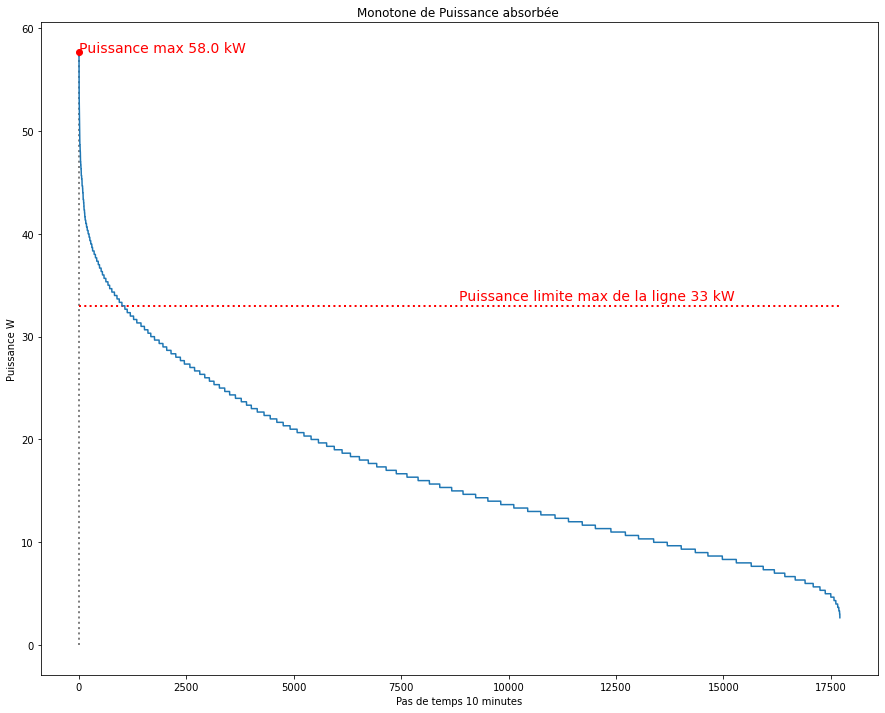

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Plimit=11*3
Monotone_Conso=[x for x in sorted(Conso["Puissance"],reverse=True)]
P_stock=Plimit-Conso[Conso['Puissance']>=Plimit]
NRJ_stock=sum(P_stock['Puissance'])/6



plt.figure(figsize=(15,12))
plt.plot(np.arange(0,len(Monotone_Conso)),Monotone_Conso)
plt.title("Monotone de Puissance absorbée ")
plt.xlabel('Pas de temps 10 minutes')                    
plt.ylabel('Puissance W')
plt.plot(10, Monotone_Conso[0], 'ro')
plt.vlines(x=10, ymin=0, ymax= Monotone_Conso[0], colors='gray', ls=':', lw=2, label='Puissance max abosrbée')
plt.hlines(y=Plimit, xmin=10, xmax=len(conso), colors='red', ls=':', lw=2, label='Puissance max absorbée')
plt.text(0,Monotone_Conso[0],'Puissance max '+str(round(Monotone_Conso[0],0))+" kW", fontsize=14, c='red')
plt.text(len(Monotone_Conso)/2,Plimit+0.5,'Puissance limite max de la ligne '+str(Plimit)+' kW', fontsize=14, color='red')
plt.plot
#plt.fill_between(Monotone_Conso, 6, where=Monotone_Conso>6, color='#539ecd')


In [6]:

print("La puissance maximale absorbée :"+str(round(max(conso),0))+" kW")
print('Puissance max system stockage= ' + str(round(min(P_stock['Puissance']),0))+" kW")
print("Energie  stockée à restituer= "+str(round(NRJ_stock,0))+ " kWh")

La puissance maximale absorbée :58.0 kW
Puissance max system stockage= -25.0 kW
Energie  stockée à restituer= -783.0 kWh


#### Consommation hebdomadaire

In [8]:
H = Highchart(width=850, height=500)
Conso_HP=Conso[(Conso.index.hour>=6)&(Conso.index.hour<22)]
Conso_HC=Conso[(Conso.index.hour<6)|(Conso.index.hour>21)]
P_stock_average_weekly=P_stock.groupby(pd.Grouper(freq='W')).sum()/6
Conso_average_weekly_HP=Conso_HP.groupby(pd.Grouper(freq='W')).sum()/6
Conso_average_weekly_HC=Conso_HC.groupby(pd.Grouper(freq='W')).sum()/6
time=list(Conso.index.strftime("%d/%m/%Y"))
data0=list(P_stock_average_weekly['Puissance'])
data1=list(Conso_average_weekly_HP['Puissance'])
data2=list(Conso_average_weekly_HC['Puissance'])
options = {
	'chart': {'type': 'column'},
        
    'title': {'text': 'Energie moyenne hebdomadaire'},
    
    'xAxis': {'categories':time},
    
        'yAxis': [{'min': -100,'tickInterval':50,'title': {'text': 'Energie'},'labels': {'format': '{value} kWh'}}], 
              #{'title': {'text': 'Puissance en HP estimée', 'style': {'color':'#F62114' }},'labels': {'format': '{value} kW'},'opposite': True}],
    'legend': {'shadow': False},
    
    'tooltip': {'shared': True},
    
    'plotOptions': {'column': {'stacking':'normal','grouping': False,'shadow': False,'borderWidth': 0,'pointWidth': 25}},
            }
H.set_dict_options(options)
#H.add_data_set(data0, 'column', 'Energie stockage ', color='#ff7f00',pointPadding=0.2, pointPlacement=-0.2)
H.add_data_set(data1, 'column', 'Consommation HP ', color='#F5130F',stack='conso',pointPadding=0.2, pointPlacement=-0.2)
H.add_data_set(data2, 'column', 'Consommation HC', color='#4444C8',stack='conso',pointPadding=0.2, pointPlacement=-0.2)


H

###  Sprint 2- Evaluation de la ressource solaire pendant la période estivale

#### Données:

point GPS Olinda: 20.80892 (North);-156.28288 (West)

Site pvgis:https://re.jrc.ec.europa.eu/pvg_tools/; 

=>données météo:TMY; Typical Meteorological Year(fichier .csv); Année de réference: 2006-2015 

=>données sortie de générateur photovoltaique:DONNÉES DU RAYONNEMENT HORAIRES; année ref 2015 lmontage fixe, inclinaison 0°, orientation 0°, 1 kWp,pertes 14%.

Caractéristique module photovoltaïque Q.PEAK DUO-G9 350 W




#### Resultats attendues:


a- Mise en forme et comparaison de l'énergie  (par unité de surface) hebdomadaire solaire  (Irradiation) et sortie de générateur photovoltaïque (électrique).

b- Déduire en première approximation la surface au sol de module PV puis la puissance crête du generateur photovoltaïque.


#### Mise en forme et comparaison de l'énergie...

In [12]:
import pandas as pd
from datetime import timedelta
source=pd.read_csv('/Users/srmac/Dropbox/Ecole des Mines Ales/Projet UE energie/tmy_20.809_-156.283_2006_2015.csv', sep=',',skip_blank_lines=True,header=16, skipfooter=13,engine='python')
index=pd.to_datetime(source["time(UTC)"], format='%Y%m%d:%H%M')
prod=pd.DataFrame(source["G(h)"].values, index=index,columns=["Irradiance_Globale"])
prod['Date']=prod.index
prod['Date'] = prod['Date'].apply(lambda x: x.strftime('2015-%m-%d %H:%M'))
prod.reset_index()
prod.set_index(pd.to_datetime(prod['Date']), inplace=True)
prod.index=prod.index-timedelta(hours=10)
prod=prod.loc['2015-05-01':'2015-08-31']

source_elec=pd.read_csv('/Users/srmac/Dropbox/Ecole des Mines Ales/Projet UE energie/Timeseries_20.809_-156.283_NS_1kWp_crystSi_14_0deg_0deg_2015_2015.csv', sep=',',skip_blank_lines=True,header=10, skipfooter=13,engine='python')
index=pd.to_datetime(source_elec["time"], format='%Y%m%d:%H%M')
prod_elec=pd.DataFrame(source_elec["P"].values, index=index,columns=["Puissance"])
prod_elec.index=prod_elec.index-timedelta(hours=10)
prod_elec=prod_elec.loc['2015-05-01':'2015-08-31']



#### graphique production consommation
a=list(prod['Irradiance_Globale'])
b=list(prod.index)
time_unix_prod=[b[i].value//1E6 for i in range(len(b))]
array_prod=a
dsp_prod=list(map(list, zip(time_unix_prod, array_prod)))

a_elec=list(prod_elec['Puissance'])
b_elec=list(prod.index)
time_unix_prod_elec=[b_elec[i].value//1E6 for i in range(len(b_elec))]
array_prod_elec=[x/((1.637*1.031)/0.35) for x in  a_elec]

In [13]:
dsp_prod_elec=list(map(list, zip(time_unix_prod_elec, array_prod_elec)))

from highcharts import Highstock

H = Highstock()
H.add_data_set(dsp_prod,'line','Irradiance',tooltip = {
    'valueDecimals': 0})
H.add_data_set(dsp_prod_elec,'line','Production electrique',tooltip = {
    'valueDecimals': 0})



options = {
    'rangeSelector' : {
        'selected' : 2
    },

    'title' : {
        'text' : 'Irradiance au sol vs Production électrique (W/m2)'
    },
    'lang': {
        'shortMonths': [
            'Janv', 'Fév', 'Mars', 'Avril',
            'Mai', 'Juin', 'Juil', 'Août',
            'Sept', 'Oct', 'Nov', 'Déc'
        ],
        'weekdays': [
            'Dimanche', 'Lundi', 'Mardi', 'Mercredi',
            'Jeudi', 'Vendredi', 'Samedi'
        ],
    },
    
}

H.set_dict_options(options)

H

#### Déduire en première approximatio la superficie du générateur PV

In [14]:
H = Highchart(width=850, height=500)

prod_average_weekly=prod.groupby(pd.Grouper(freq='W')).sum()/6
prod_elec_average_weekly=prod_elec.groupby(pd.Grouper(freq='W')).sum()/6

P_stock_average_weekly=P_stock.groupby(pd.Grouper(freq='W')).sum()/6

time=list(prod_average_weekly.index.strftime("%d/%m/%Y"))
data0=[x/1000 for x in list(prod_average_weekly['Irradiance_Globale'])]
data1=[x*(-1) for x in list(round(P_stock_average_weekly.Puissance,0))]

data3=[x/1000 for x in list(prod_elec_average_weekly['Puissance'])]
data2=[data1[i]/data3[i] for i in np.arange(len(data1))] 
options = {
	'chart': {'type': 'column'},
        
    'title': {'text': 'Irradiation hebdomadaire'},
    
    'xAxis': {'categories':time},
    
        'yAxis': [{'min': 0,'tickInterval':1,'title': {'text': 'Irradiation'},'labels': {'format': '{value} kWh/m2'}},  
              {'min': 0,'tickInterval':10,'title': {'text': 'Energie à stocker', 'style': {'color':'#FFFFF' }},'labels': {'format': '{value} kWh'},'opposite': True}],
    'legend': {'shadow': False},
    
    'tooltip': {'shared': True},
    
    'plotOptions': {'column': {'stacking':'normal','grouping': False,'shadow': False,'borderWidth': 0,'pointWidth': 25}},
            }
H.set_dict_options(options)

H.add_data_set(data0,'column', 'Irradiation hebdomadaire ', color='#ff7f00',pointPadding=0.2, pointPlacement=0.2)
H.add_data_set(data1,'column', 'Energie à stocker ', color='#8282DA',yAxis=1,pointPadding=0.2, pointPlacement=-0.2)
H.add_data_set(data2,'scatter', 'Surface ', color='#E82F1C',yAxis=1,pointPadding=0.2, pointPlacement=-0.2)
H.add_data_set(data3,'column', 'Energie surfacique PV hebdomadaire ', color='#f3d440 ',pointPadding=0.2, pointPlacement=0.2)

H

En première approximation et pour un module de type Q.PEAK DUO-G9 350W, la superficie sera entre 20 et 30 m2.

### Sprint 4- Problématique de transfert de puissance sur ligne électrique de distribution, application



#### Données:

longueur de la ligne: 2km

résistivité=3,32 10 -8 Ωm

section: 180 mm2

réactance linéique = 3,0 10-4 Ω/m 


courbe de charge du village: fichier csv

Phi=0.52 rad

tension du poste de distribution: 250V

charge linéaire (Facteur de puissance = cos phi)

chute de tension < 10% de la tension normalise 230 V

#### Méthode:

a-Modélisation monophasée de la ligne de distribution triphasée

b-Bilan de puissance

c-Tracer l'équation dans le plan V=f(P), agir sur le paramètre Phi et conclure.

d- Mettre en évidence la problématique de puissance transmissible par cette ligne

##### a-Modélisation monophasé de la ligne de distribution triphasé

On modélise la ligne sur une phase en tenant compte de ses caractéristiques.

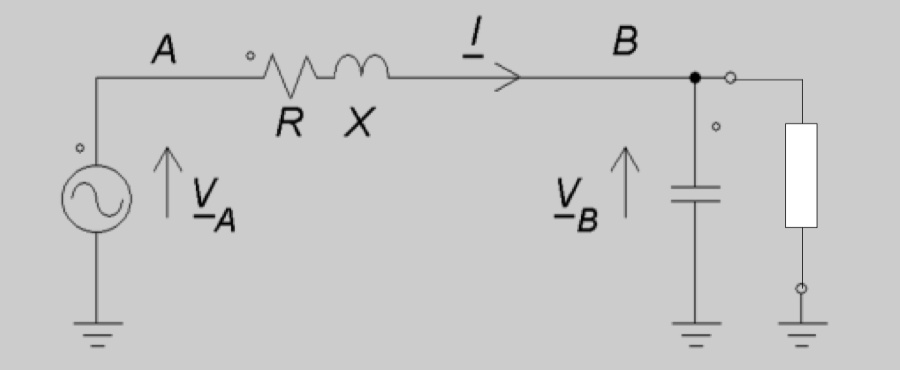

In [15]:
from IPython.display import Image
Image("/Users/srmac/Dropbox/Ecole des Mines Ales/Projet UE energie/modelisation_ligne.png")

##### b-Bilan de puissance

$S^2=P^2+Q^2$

avec $I=\frac{PB}{VB.cos\phi}$

et $QB=PB.tan\phi$

on trouve:

$VB^4-VB^2.(2.PB.tan\phi.X +2.P.R-E^2) + P^2.(R^2+X^2)\frac{1}{cos^2\phi} =0$

Résoudre le système, tracer VB=f(PB), on constate les limites de puissance transmissible  en fonction de la charge ($VB=\sqrt{RB.PB}$ ("courbe verte") , de la chute de tension admissible et des caractéristiques de la ligne.


Saisir la valeur de Rligne=0.37
Saisir la valeur de Xligne=0.6
Saisir la valeur de E=250
Saisir la valeur de Phi=0.52


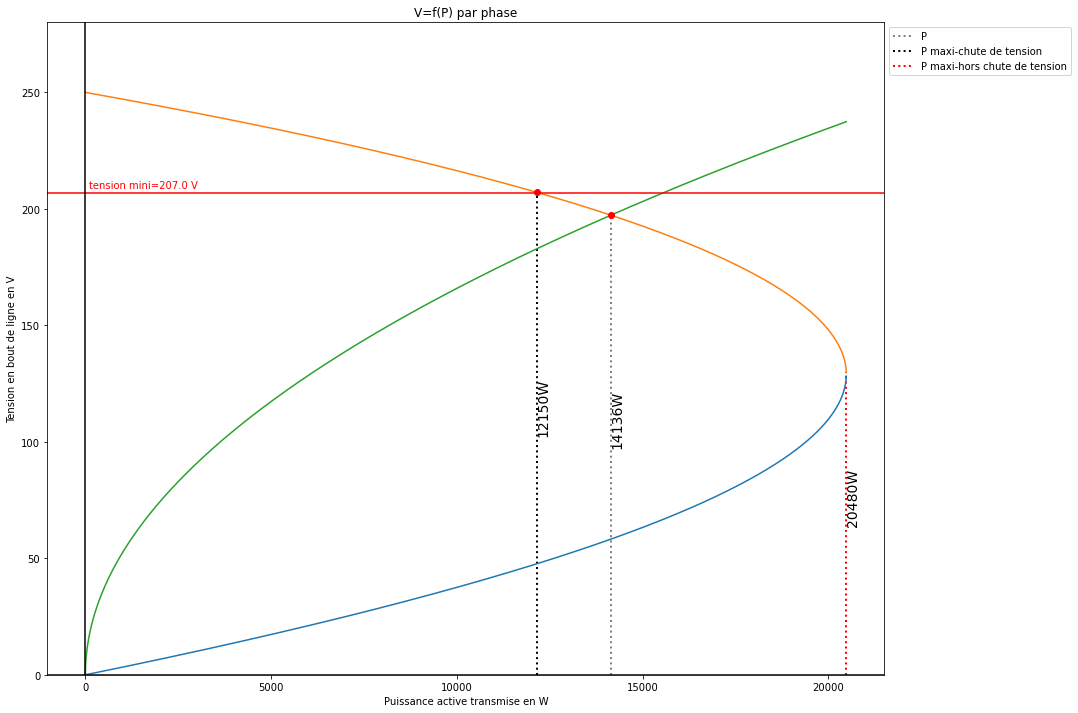

In [8]:
# commentaire ligne avec R+X
# resolution equation seconde degre stav
# version 3
import numpy as np

R=float(input("Saisir la valeur de Rligne="))
X=float(input("Saisir la valeur de Xligne="))
E=float(input("Saisir la valeur de E="))
Phi=float(input("Saisir la valeur de Phi="))
dU=0.1
X1=[]
X2=[]
PB=[]


for Pb in range(0,int(E**2/(X**2+R**2)**0.5),1):
    a=1
    b=2*X*np.tan(Phi)*Pb+2*Pb*R-E**2
    c=((R**2+X**2)/np.cos(Phi)**2)*Pb**2
    #calcul de delta
    delta=b**2-4*a*c

    #affichage
    #print("résolution de l'équation ",a," vb² + ",b," vb + ",c)

    # condition sur delta dans cet ordre >0 puis ==0 puis <0
    if delta>0:
        x1=((-b-delta**0.5)/(2*a))**0.5
        x2=((-b+delta**0.5)/(2*a))**0.5
        #print("Delta est positif donc il y a 2 solutions")
        #print("VB1 =",x1)
        #print("VB2 =",x2)
        #print("Pb =",Pb)
        X1.append(x1)
        X2.append(x2)
        PB.append(Pb)
    else:
        if delta==0:
            x0=(-b/(2*a))**0.5
            #print("Delta est nul donc il y a 1 solution unique")
            #print("x0 =",x0)
        else:
            #print("Pas de solution dans l'espace de réel")
            break
    
   #représentation graphique
import numpy as np
import matplotlib.pyplot as plt

#encadrement pour le graphique
dU=0.1
Rc=3*230**2/(max(Conso['Puissance'])*1000)

V=list((Rc*PB[i])**0.5 for i in range (len(PB)))

plt.figure(figsize=(15,12))
plt.plot(PB,X1)
plt.plot(PB,X2)
plt.plot(PB,V)

idx1 = np.argwhere(np.isclose(X2, V, atol=0.1)).reshape(-1)
plt.plot(idx1[0], V[idx1[0]], 'ro')
idx2 = np.argwhere(np.isclose(230*(1-dU), X2, atol=0.1)).reshape(-1)
plt.plot(idx2[0], X2[idx2[0]], 'ro')
# single vline with specific ymin and ymax
plt.vlines(x=idx1[0], ymin=0, ymax= V[idx1[0]], colors='gray', ls=':', lw=2, label='P')
plt.text(idx1[0],V[idx1[0]]/2,str(idx1[0])+"W", rotation=90,fontsize=14)
plt.vlines(x=idx2[0], ymin=0, ymax= X2[idx2[0]], colors='black', ls=':', lw=2, label='P maxi-chute de tension')
plt.text(idx2[0],X2[idx2[0]]/2,str(idx2[0])+"W", rotation=90,fontsize=14)
plt.vlines(x=max(PB), ymin=0, ymax= X2[max(PB)], colors='red', ls=':', lw=2, label='P maxi-hors chute de tension')
plt.text(max(PB),X2[max(PB)]/2,str(max(PB))+"W", rotation=90,fontsize=14)


# place legend outside
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')



plt.axhline(y=230*(1-dU), color="red")
plt.text(100, 230*(1-dU)+2, 'tension mini='+ str(230*(1-dU))+" V", fontsize=10, color='red')
plt.plot

plt.ylim(ymax = 280, ymin = 0)
plt.title("V=f(P) par phase")
plt.axhline(y=0,color='black')
plt.axvline(x=0,color='black')
plt.xlabel('Puissance active transmise en W')                      # Légende abscisse
plt.ylabel('Tension en bout de ligne en V')  


plt.show() # affiche la figure a l'ecranplt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
    



In [1]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js"></script>